# Name: Riad Mohammed
## Class: CSE4510 Big Data
### Professor: Dr. Fitz
### Assignment 1
### Due: 09/18/22

### Question 1) Reading the Data (4pts)
####                    (a) Load the dataset using pandas



In [458]:
import pandas as pd

In [459]:
#reads csv data from excel
sales_main = pd.read_csv("data/rollingsales_brooklyn.csv",skiprows=4)

####                    (b) Display the shape of the data to make sure it was read

In [460]:
#outputs the shape ,i.e the rows and columns
sales_main.shape

(23373, 21)

####                    (c) Display the first 2 rows

In [461]:
sales_main.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$403,572",7/9/13
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$218,010",7/12/13


####                    (d) Display row 14 to see the field names clearly

In [462]:
sales_main.iloc[14]

BOROUGH                                                                      3
NEIGHBORHOOD                                         BATH BEACH               
BUILDING CLASS CATEGORY                                                       
TAX CLASS AT PRESENT                                                         4
BLOCK                                                                     6370
LOT                                                                       1321
EASE-MENT                                                                     
BUILDING CLASS AT PRESENT                                                   RP
ADDRESS                             98 BAY 20TH   STREET                      
APART\nMENT\nNUMBER                                               P1          
ZIP CODE                                                                 11214
RESIDENTIAL UNITS                                                            0
COMMERCIAL UNITS                                    

### Question 2) Reformatting column labels (4pts)
####                     a) Convert the column names to lower case

In [463]:
sales_main.columns = sales_main.columns.str.lower()

#### b) Replace the '\n' in the column names with space

In [464]:
sales_main.columns = sales_main.columns.str.replace('\n',' ')

#### c) Replace the spaces in the column names with underscores

In [465]:
sales_main.columns = sales_main.columns.str.replace(' ','_')

#### d) Display row 14 again to see the change in the field names

In [466]:
sales_main.iloc[14]

borough                                                                      3
neighborhood                                         BATH BEACH               
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     6370
lot                                                                       1321
ease-ment                                                                     
building_class_at_present                                                   RP
address                             98 BAY 20TH   STREET                      
apart_ment_number                                                 P1          
zip_code                                                                 11214
residential_units                                                            0
commercial_units                                    

#### 3) Convert the field “sale_price” to numeric (it is currently formatted as currency which cannot be used in calculations.) (Hints: There is a to_numeric function. You will first need to remove the commas and dollar signs. See slide 33 or 35 of the Pandas preprocessing tutorial.) (2pts)


In [467]:
#Shows the sale price column format before changes
sales_main['sale_price'] 

0          $403,572
1          $218,010
2          $952,311
3          $842,692
4          $815,288
            ...    
23368            $0
23369            $0
23370    $1,090,000
23371            $0
23372            $0
Name: sale_price, Length: 23373, dtype: object

In [468]:
#Removes $ from the currency
sales_main['sale_price'] = sales_main.sale_price.str.replace('$','')

C:\Users\Riad\AppData\Local\Temp/ipykernel_4056/2932720525.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sales_main['sale_price'] = sales_main.sale_price.str.replace('$','')


In [469]:
#Removes , from the currency
sales_main.sale_price = sales_main.sale_price.str.replace(',','')

In [470]:
#Actually currency to numeric conversion
sales_main['sale_price'] = pd.to_numeric(sales_main.sale_price)

In [471]:
#Shows the sale price column format after changes
sales_main.sale_price

0         403572
1         218010
2         952311
3         842692
4         815288
          ...   
23368          0
23369          0
23370    1090000
23371          0
23372          0
Name: sale_price, Length: 23373, dtype: int64

#### 4) Display a count of missing sale prices (those set to '0s') (1pt)

In [472]:
counts = sales_main.sale_price.value_counts()

In [473]:
counts

0         8791
10         241
700000     138
650000     129
300000     120
          ... 
737000       1
751000       1
498942       1
599500       1
354969       1
Name: sale_price, Length: 3318, dtype: int64

In [474]:
#Using value count to get the missing sale prices since it is the highest frequency 
count_missing_prices = counts.values[0]

In [475]:
count_missing_prices

8791

#### 5) Convert “land_square_feet” to numeric (it’s currently a formatted string which cannot be used in calculations) (1pt)


In [476]:
#Shows the land square feet format BEFORE changes
sales_main.land_square_feet

0             0
1             0
2             0
3             0
4             0
          ...  
23368    10,250
23369     3,600
23370     5,017
23371     2,500
23372     6,000
Name: land_square_feet, Length: 23373, dtype: object

In [477]:
#Removes commas
sales_main.land_square_feet = sales_main.land_square_feet.str.replace(',','')

In [478]:
#Actually conversion
sales_main['land_square_feet'] = pd.to_numeric(sales_main.land_square_feet)

In [479]:
#Shows the land square feet format AFTER changes
sales_main.land_square_feet

0            0
1            0
2            0
3            0
4            0
         ...  
23368    10250
23369     3600
23370     5017
23371     2500
23372     6000
Name: land_square_feet, Length: 23373, dtype: int64

#### 6) Convert “gross_square_feet” to numeric, “sale_date” to datetime, “year_built” to numeric (int32), and “zip_code” to string (4pts)


In [480]:
#Shows the gross square feet BEFORE changes
sales_main.gross_square_feet

0            0
1            0
2            0
3            0
4            0
         ...  
23368    6,675
23369    2,800
23370    5,000
23371    2,475
23372    7,140
Name: gross_square_feet, Length: 23373, dtype: object

In [481]:
#Removes comma 
sales_main.gross_square_feet = sales_main.gross_square_feet.str.replace(',','')

In [482]:
#Actually conversion to numeric 
sales_main['gross_square_feet'] = pd.to_numeric(sales_main.gross_square_feet)

In [483]:
#Shows the gross square feet AFTER changes
sales_main.gross_square_feet

0           0
1           0
2           0
3           0
4           0
         ... 
23368    6675
23369    2800
23370    5000
23371    2475
23372    7140
Name: gross_square_feet, Length: 23373, dtype: int64

In [484]:
#Shows the sale date BEFORE changes
sales_main.sale_date

0          7/9/13
1         7/12/13
2         4/25/13
3         4/25/13
4         4/25/13
           ...   
23368     1/17/13
23369     1/17/13
23370    12/28/12
23371     4/17/13
23372    12/14/12
Name: sale_date, Length: 23373, dtype: object

In [485]:
#Actual sale date conversion to datetime
sales_main.sale_date = pd.to_datetime(sales_main.sale_date)

In [486]:
#Shows the sale date AFTER changes
sales_main.sale_date

0       2013-07-09
1       2013-07-12
2       2013-04-25
3       2013-04-25
4       2013-04-25
           ...    
23368   2013-01-17
23369   2013-01-17
23370   2012-12-28
23371   2013-04-17
23372   2012-12-14
Name: sale_date, Length: 23373, dtype: datetime64[ns]

In [487]:
#Shows the year built BEFORE changes
sales_main.year_built

0           0
1           0
2           0
3           0
4           0
         ... 
23368    1931
23369    1931
23370    1972
23371    1931
23372    1931
Name: year_built, Length: 23373, dtype: int64

In [488]:
#Actually conversion to specific int32
sales_main['year_built'] = sales_main.year_built.astype('int32')

In [489]:
#Shows the year AFTER changes
sales_main.year_built

0           0
1           0
2           0
3           0
4           0
         ... 
23368    1931
23369    1931
23370    1972
23371    1931
23372    1931
Name: year_built, Length: 23373, dtype: int32

In [490]:
#Shows the zip code before changes
sales_main.zip_code

0        11220
1        11220
2        11238
3        11238
4        11238
         ...  
23368    11237
23369    11237
23370    11237
23371    11237
23372    11237
Name: zip_code, Length: 23373, dtype: int64

In [491]:
#Actually change to string
sales_main['zip_code'] = sales_main.zip_code.apply(str)

In [492]:
#Shows the zip code AFTER changes
sales_main.zip_code

0        11220
1        11220
2        11238
3        11238
4        11238
         ...  
23368    11237
23369    11237
23370    11237
23371    11237
23372    11237
Name: zip_code, Length: 23373, dtype: object

In [493]:
#Shows datatypes of all, including the updated ones
sales_main.dtypes

borough                                    int64
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                      int64
lot                                        int64
ease-ment                                 object
building_class_at_present                 object
address                                   object
apart_ment_number                         object
zip_code                                  object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                           int64
gross_square_feet                          int64
year_built                                 int32
tax_class_at_time_of_sale                  int64
building_class_at_time_of_sale            object
sale_price                                 int64
sale_date           

#### 7) Change EAST/WEST to E/W for each address (2pts)


In [494]:
#Shows a sample data with EAST being unchanged
sales_main.iloc[3411]

borough                                                                      3
neighborhood                                         BERGEN BEACH             
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     8342
lot                                                                       1031
ease-ment                                                                     
building_class_at_present                                                   RG
address                             1092 EAST 73RD   STREET                   
apart_ment_number                                                 G31         
zip_code                                                                 11234
residential_units                                                            0
commercial_units                                    

In [495]:
sales_main['address'] = sales_main.address.str.replace('EAST','E')

In [496]:
sales_main['address'] = sales_main.address.str.replace('WEST','W')

In [497]:
#Shows a sample data with East being changed to E
sales_main.iloc[3411]

borough                                                                      3
neighborhood                                         BERGEN BEACH             
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     8342
lot                                                                       1031
ease-ment                                                                     
building_class_at_present                                                   RG
address                                1092 E 73RD   STREET                   
apart_ment_number                                                 G31         
zip_code                                                                 11234
residential_units                                                            0
commercial_units                                    

#### 8) Change STREET/AVENUE to ST/AVE for each address (2pts)

In [498]:
#Shows a sample data with AVENUE being unchanged
sales_main.iloc[23368]

borough                                                                      3
neighborhood                                         WYCKOFF HEIGHTS          
building_class_category           30  WAREHOUSES                              
tax_class_at_present                                                         4
block                                                                     3167
lot                                                                          8
ease-ment                                                                     
building_class_at_present                                                   E9
address                             1144 FLUSHING AVENUE                      
apart_ment_number                                                             
zip_code                                                                 11237
residential_units                                                            0
commercial_units                                    

In [499]:
sales_main['address'] = sales_main.address.str.replace('STREET','ST')

In [500]:
sales_main['address'] = sales_main.address.str.replace('AVENUE','AVE')

In [501]:
#Shows a sample data with AVENUE being changed to AVE
sales_main.iloc[23368]

borough                                                                      3
neighborhood                                         WYCKOFF HEIGHTS          
building_class_category           30  WAREHOUSES                              
tax_class_at_present                                                         4
block                                                                     3167
lot                                                                          8
ease-ment                                                                     
building_class_at_present                                                   E9
address                                1144 FLUSHING AVE                      
apart_ment_number                                                             
zip_code                                                                 11237
residential_units                                                            0
commercial_units                                    

#### 9)  Plot the following histograms: (4pts) 
#### a)  sale price by counts
      

array([[<AxesSubplot:title={'center':'sale_price'}>]], dtype=object)

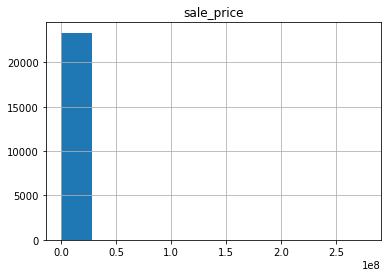

In [502]:
sales_main.hist(column='sale_price')

#### b) sale price > 0

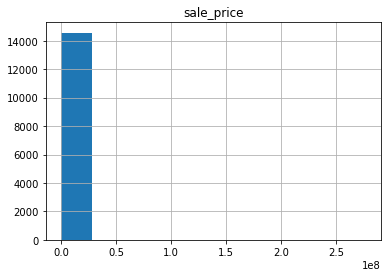

In [503]:
sales_main[sales_main['sale_price']>0].hist(column = 'sale_price');

#### c) gross sqft where sale price == 0

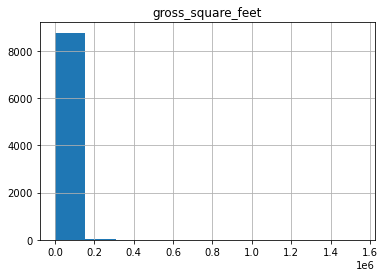

In [504]:
sales_main[sales_main['sale_price']==0].hist(column = 'gross_square_feet');

#### 10) Filter the data by family homes (i.e., return a subset of rows in a temp variable where the "building_class_category" contains "FAMILY" ) (2pts)


In [505]:
temp_family_homes = sales_main[sales_main['building_class_category'].str.contains('FAMILY')]

In [506]:
temp_family_homes

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVE,,...,1,0,1,2058,1492,1930,1,A9,560000,2013-06-06
26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH ST,,...,1,0,1,4833,1724,1930,1,A1,860000,2012-12-18
27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH ST,,...,1,0,1,2417,2132,1930,1,A9,508000,2012-08-24
28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH ST,,...,1,0,1,3867,1704,1899,1,A1,600000,2013-06-18
29,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,42,,S1,2142 86TH ST,,...,1,1,2,1600,2640,1925,1,S1,0,2012-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23292,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3311,15,,C0,382 BLEECKER ST,,...,3,0,3,2000,2880,1931,1,C0,100000,2012-10-02
23293,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3319,42,,C0,377 GROVE ST,,...,3,0,3,2000,4000,1931,1,C0,0,2012-12-07
23294,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3320,37,,C0,427 GROVE ST,,...,3,0,3,2000,4194,1920,1,C0,0,2013-02-04
23295,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3371,14,,C0,1384 MADISON ST,,...,3,0,3,2000,4400,1910,1,C0,600000,2013-06-10


#### 11)  Create a log scatter plot of “gross sqft” vs “sale price” for family homes (2pts)


C:\Users\Riad\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


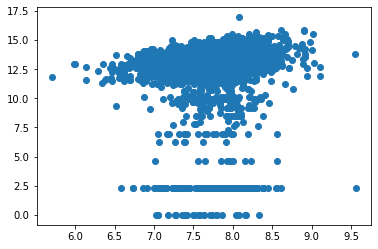

In [507]:
import numpy as np
import matplotlib.pyplot as plt

xlog = np.log(temp_family_homes.gross_square_feet)
ylog = np.log(temp_family_homes.sale_price)

#create log-log plot
plt.scatter(xlog, ylog)

#### 12) Return a subset of family homes where sale price<100000. How many homes fall in this category? (2pts)

In [508]:
family_homes_under_100000 = temp_family_homes[temp_family_homes['sale_price']<100000]

In [509]:
family_homes_under_100000

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
29,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,42,,S1,2142 86TH ST,,...,1,1,2,1600,2640,1925,1,S1,0,2012-12-14
35,3,BATH BEACH,01 ONE FAMILY HOMES,1,6426,10,,A2,239 BAY 8TH ST,,...,1,0,1,5810,2835,1950,1,A2,0,2012-09-27
37,3,BATH BEACH,01 ONE FAMILY HOMES,1,6428,65,,A9,228 BAY 11TH ST,,...,1,0,1,1990,1328,1925,1,A9,0,2012-09-25
39,3,BATH BEACH,01 ONE FAMILY HOMES,1,6444,11,,A5,211 BAY 26TH ST,,...,1,0,1,2223,2070,1955,1,A5,0,2012-10-22
40,3,BATH BEACH,01 ONE FAMILY HOMES,1,6460,35,,A1,8863 15TH AVE,,...,1,0,1,5800,4071,1925,1,A1,0,2012-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23288,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3301,24,,C0,1450 GREENE AVE,,...,3,0,3,2000,3060,1899,1,C0,0,2013-05-21
23291,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3310,3,,C0,275 IRVING AVE,,...,3,0,3,1800,3300,1931,1,C0,0,2012-12-18
23293,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3319,42,,C0,377 GROVE ST,,...,3,0,3,2000,4000,1931,1,C0,0,2012-12-07
23294,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3320,37,,C0,427 GROVE ST,,...,3,0,3,2000,4194,1920,1,C0,0,2013-02-04


In [510]:
temp_family_homes[temp_family_homes['sale_price']<100000].shape[0]

4745

#### Q13) Return a count of the sale prices (Notice that some homes were sold for a 1, etc. These seem to be outliers) (1pt)


In [511]:
sale_prices_counts = family_homes_under_100000.sale_price.value_counts()

In [512]:
sale_prices_counts

0        4306
10        174
20000      28
1          27
1000       22
         ... 
16500       1
13000       1
10574       1
3278        1
44000       1
Name: sale_price, Length: 82, dtype: int64

#### Q14)  Remove outliers of sales with sale price <= 5 (2pts)


In [513]:
new_sale_price = family_homes_under_100000[family_homes_under_100000['sale_price']>5]

In [514]:
new_sale_price

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
84,3,BATH BEACH,02 TWO FAMILY HOMES,1,6394,36,,B1,8691 15TH AVE,,...,2,0,2,2344,3240,1940,1,B1,97500,2012-11-20
101,3,BATH BEACH,02 TWO FAMILY HOMES,1,6413,65,,B3,140 BAY 29TH ST,,...,2,0,2,2900,2000,1925,1,B3,10,2013-02-28
116,3,BATH BEACH,02 TWO FAMILY HOMES,1,6433,11,,B3,1701 CROPSEY AVE,,...,2,0,2,1906,2490,1920,1,B3,10,2012-11-13
372,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5967,3,,A1,7821 COLONIAL ROAD,,...,1,0,1,3000,2288,1925,1,A1,10,2013-05-14
438,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6053,39,,A5,38 GATLING PLACE,,...,1,0,1,1401,1010,1925,1,A5,10,2013-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21503,3,WILLIAMSBURG-CENTRAL,03 THREE FAMILY HOMES,1,2231,62,,C0,51 LYNCH ST,,...,3,0,3,1700,2295,1899,1,C0,92000,2013-03-21
21768,3,WILLIAMSBURG-EAST,02 TWO FAMILY HOMES,1,2739,3,,B9,386 MANHATTAN AVE,,...,2,0,2,1250,1440,1901,1,B9,75432,2012-08-14
21784,3,WILLIAMSBURG-EAST,02 TWO FAMILY HOMES,1,2767,14,,B9,16 DEVOE ST,,...,2,0,2,1962,2740,1899,1,B9,10,2013-01-11
22759,3,WILLIAMSBURG-SOUTH,01 ONE FAMILY HOMES,1,2395,128,,S1,245 SOUTH 1ST ST,,...,1,1,2,1283,2300,1910,1,S1,44000,2013-01-09


In [515]:
temp_family_homes2 = family_homes_under_100000[family_homes_under_100000['sale_price']>5]

In [516]:
temp_family_homes2

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
84,3,BATH BEACH,02 TWO FAMILY HOMES,1,6394,36,,B1,8691 15TH AVE,,...,2,0,2,2344,3240,1940,1,B1,97500,2012-11-20
101,3,BATH BEACH,02 TWO FAMILY HOMES,1,6413,65,,B3,140 BAY 29TH ST,,...,2,0,2,2900,2000,1925,1,B3,10,2013-02-28
116,3,BATH BEACH,02 TWO FAMILY HOMES,1,6433,11,,B3,1701 CROPSEY AVE,,...,2,0,2,1906,2490,1920,1,B3,10,2012-11-13
372,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5967,3,,A1,7821 COLONIAL ROAD,,...,1,0,1,3000,2288,1925,1,A1,10,2013-05-14
438,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6053,39,,A5,38 GATLING PLACE,,...,1,0,1,1401,1010,1925,1,A5,10,2013-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21503,3,WILLIAMSBURG-CENTRAL,03 THREE FAMILY HOMES,1,2231,62,,C0,51 LYNCH ST,,...,3,0,3,1700,2295,1899,1,C0,92000,2013-03-21
21768,3,WILLIAMSBURG-EAST,02 TWO FAMILY HOMES,1,2739,3,,B9,386 MANHATTAN AVE,,...,2,0,2,1250,1440,1901,1,B9,75432,2012-08-14
21784,3,WILLIAMSBURG-EAST,02 TWO FAMILY HOMES,1,2767,14,,B9,16 DEVOE ST,,...,2,0,2,1962,2740,1899,1,B9,10,2013-01-11
22759,3,WILLIAMSBURG-SOUTH,01 ONE FAMILY HOMES,1,2395,128,,S1,245 SOUTH 1ST ST,,...,1,1,2,1283,2300,1910,1,S1,44000,2013-01-09


#### Q15) With the outliers removed, create a plot of “gross sqft” vs “sale price” (2pts)


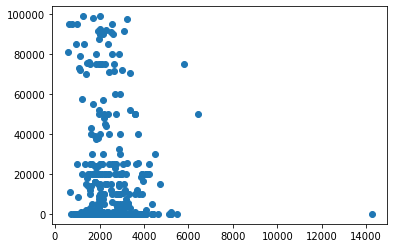

In [517]:
import numpy as np
import matplotlib.pyplot as plt

x = temp_family_homes2.gross_square_feet
y = temp_family_homes2.sale_price


plt.scatter(x, y)

#### Q16) Create a plot of the top 10 home sales for family homes

In [518]:
#Checks data before changes made
temp_family_homes

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVE,,...,1,0,1,2058,1492,1930,1,A9,560000,2013-06-06
26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH ST,,...,1,0,1,4833,1724,1930,1,A1,860000,2012-12-18
27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH ST,,...,1,0,1,2417,2132,1930,1,A9,508000,2012-08-24
28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH ST,,...,1,0,1,3867,1704,1899,1,A1,600000,2013-06-18
29,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,42,,S1,2142 86TH ST,,...,1,1,2,1600,2640,1925,1,S1,0,2012-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23292,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3311,15,,C0,382 BLEECKER ST,,...,3,0,3,2000,2880,1931,1,C0,100000,2012-10-02
23293,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3319,42,,C0,377 GROVE ST,,...,3,0,3,2000,4000,1931,1,C0,0,2012-12-07
23294,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3320,37,,C0,427 GROVE ST,,...,3,0,3,2000,4194,1920,1,C0,0,2013-02-04
23295,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3371,14,,C0,1384 MADISON ST,,...,3,0,3,2000,4400,1910,1,C0,600000,2013-06-10


In [519]:
#Counts the frequent data
temp_family_homes['sale_price'].value_counts()

0          4306
10          174
600000       82
700000       77
650000       75
           ... 
1302850       1
472150        1
2995000       1
789500        1
713600        1
Name: sale_price, Length: 1571, dtype: int64

In [520]:
#Removes outliers
temp_family_homes2 = temp_family_homes[temp_family_homes['sale_price']>5]

In [521]:
#Shows data after cleaning data
temp_family_homes2

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVE,,...,1,0,1,2058,1492,1930,1,A9,560000,2013-06-06
26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH ST,,...,1,0,1,4833,1724,1930,1,A1,860000,2012-12-18
27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH ST,,...,1,0,1,2417,2132,1930,1,A9,508000,2012-08-24
28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH ST,,...,1,0,1,3867,1704,1899,1,A1,600000,2013-06-18
30,3,BATH BEACH,01 ONE FAMILY HOMES,1,6380,69,,S1,8662 BAY PARKWAY,,...,1,1,2,2707,3304,1960,1,S1,820000,2012-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3272,18,,C0,400 STANHOPE ST,,...,3,0,3,1967,2925,1910,1,C0,400000,2012-08-22
23289,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3302,35,,C0,240 ST NICHOLAS AVE,,...,3,0,3,1800,3300,1928,1,C0,680000,2013-01-25
23290,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3303,24,,C0,1570 GREENE AVE,,...,3,0,3,1950,3303,1920,1,C0,700000,2013-05-31
23292,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3311,15,,C0,382 BLEECKER ST,,...,3,0,3,2000,2880,1931,1,C0,100000,2012-10-02


In [522]:
family_home_sales = temp_family_homes2['sale_price'].value_counts()

In [523]:
family_home_sales

10         174
600000      82
700000      77
650000      75
300000      71
          ... 
1302850      1
472150       1
2995000      1
789500       1
713600       1
Name: sale_price, Length: 1569, dtype: int64

In [524]:
#Obtains the first 10 data sets
family_home_sales.head(10)

10        174
600000     82
700000     77
650000     75
300000     71
550000     61
800000     61
450000     59
200000     59
400000     58
Name: sale_price, dtype: int64

In [525]:
top10=family_home_sales.head(10)

In [526]:
top10.values

array([174,  82,  77,  75,  71,  61,  61,  59,  59,  58], dtype=int64)

In [527]:
top10.index

Int64Index([10, 600000, 700000, 650000, 300000, 550000, 800000, 450000, 200000,
            400000],
           dtype='int64')

In [528]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Top 10 Home Sales')

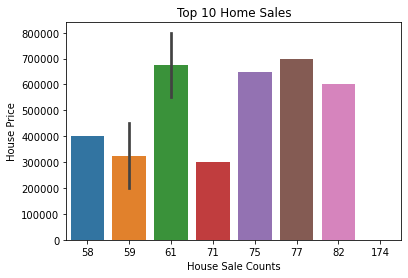

In [529]:
sns.barplot(x=top10.values,y=top10.index)
plt.xlabel("House Sale Counts")
plt.ylabel("House Price")
plt.title("Top 10 Home Sales")